<a href="https://colab.research.google.com/github/rasaghnak/customerSegmentationAnalysis/blob/main/customerSegmentationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [22]:
df=pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.rename(columns={'Genre':'Gender'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.shape

(200, 5)

In [27]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [29]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [30]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


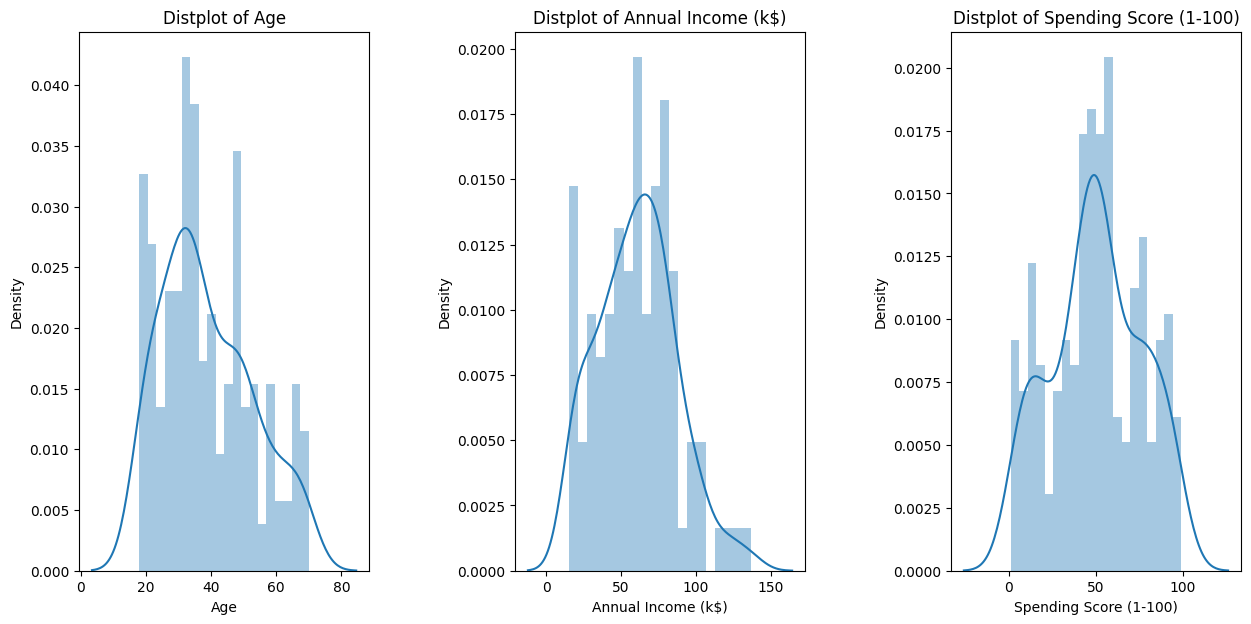

In [35]:
plt.figure(1, figsize=(15,7))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

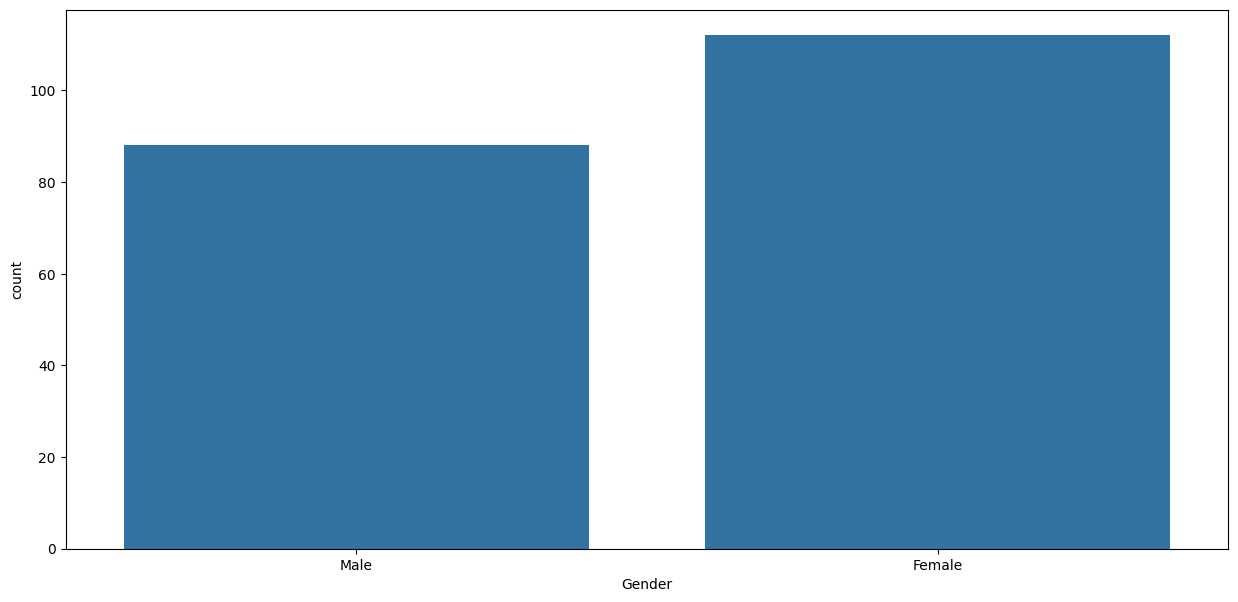

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(x='Gender', data=df)
plt.show()



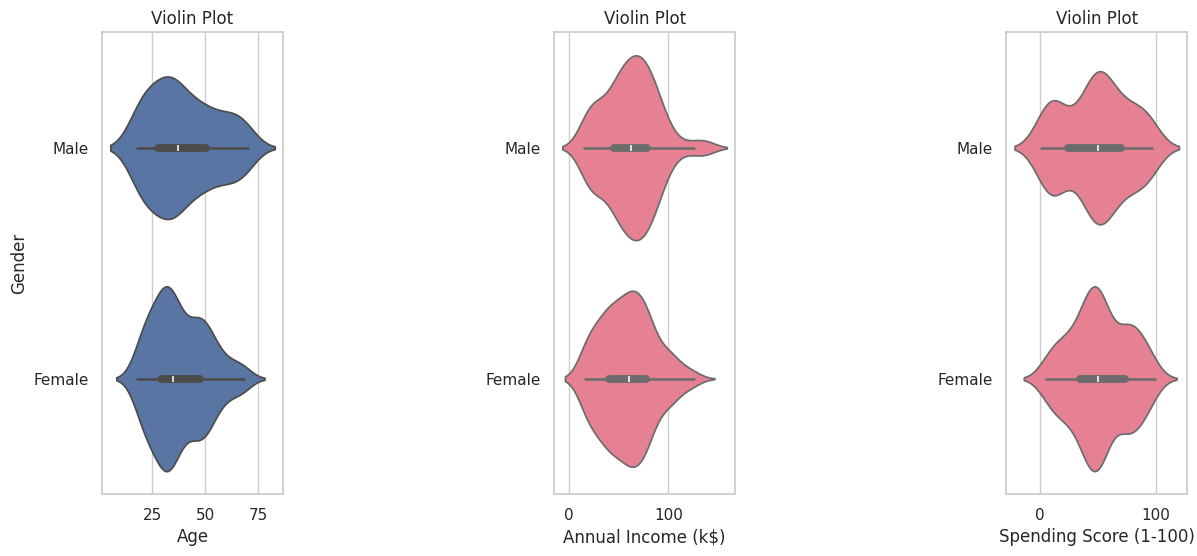

In [49]:
plt.figure(1,figsize=(14,6))
n=0
for k in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid',palette='husl')
    plt.subplots_adjust(hspace=1.5, wspace=1.5)
    sns.violinplot(x=k,y='Gender',data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show()

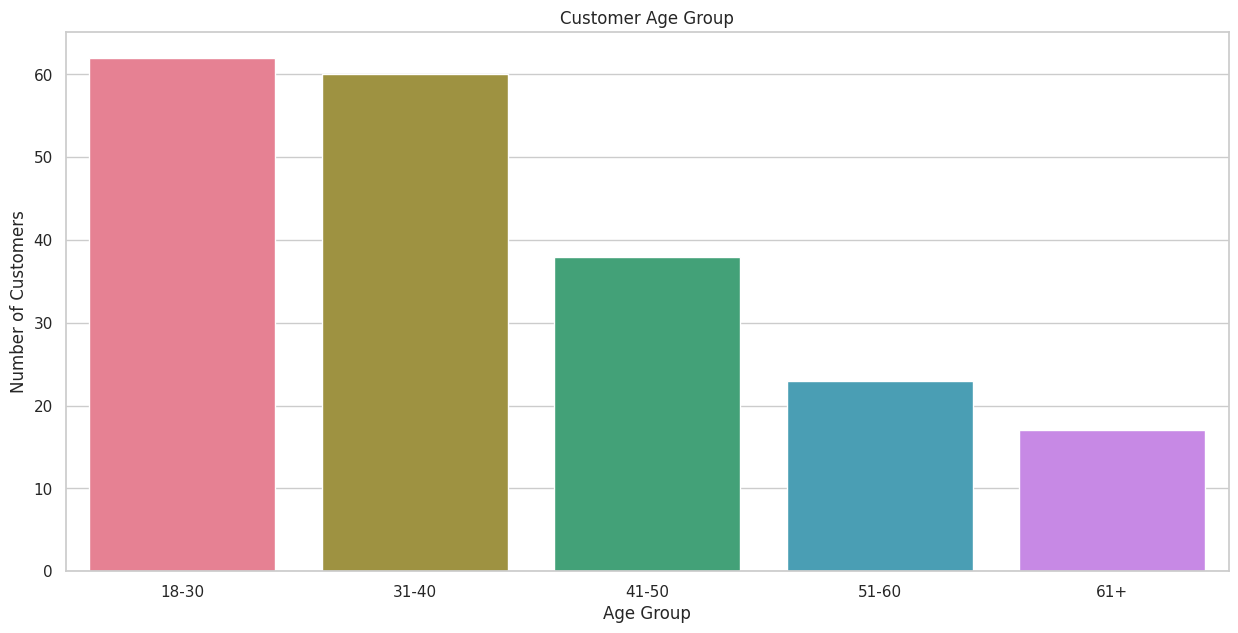

In [50]:
age_grp1= df.Age[(df.Age>=18) & (df.Age<=30)]
age_grp2= df.Age[(df.Age>=31) & (df.Age<=40)]
age_grp3= df.Age[(df.Age>=41) & (df.Age<=50)]
age_grp4= df.Age[(df.Age>=51) & (df.Age<=60)]
age_grp5= df.Age[df.Age>=61]
agex=["18-30","31-40","41-50","51-60","61+"]
agey=[len(age_grp1),len(age_grp2),len(age_grp3),len(age_grp4),len(age_grp5)]

plt.figure(figsize=(15,7))
sns.barplot(x=agex,y=agey,palette='husl')
plt.title('Customer Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

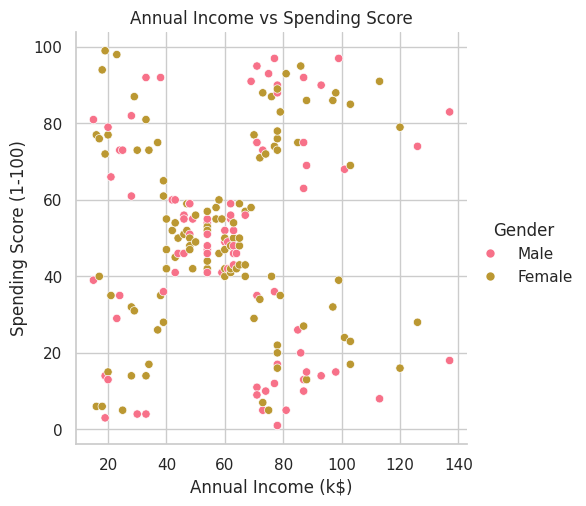

In [51]:
# Relationship with spending score
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income vs Spending Score')
plt.show()

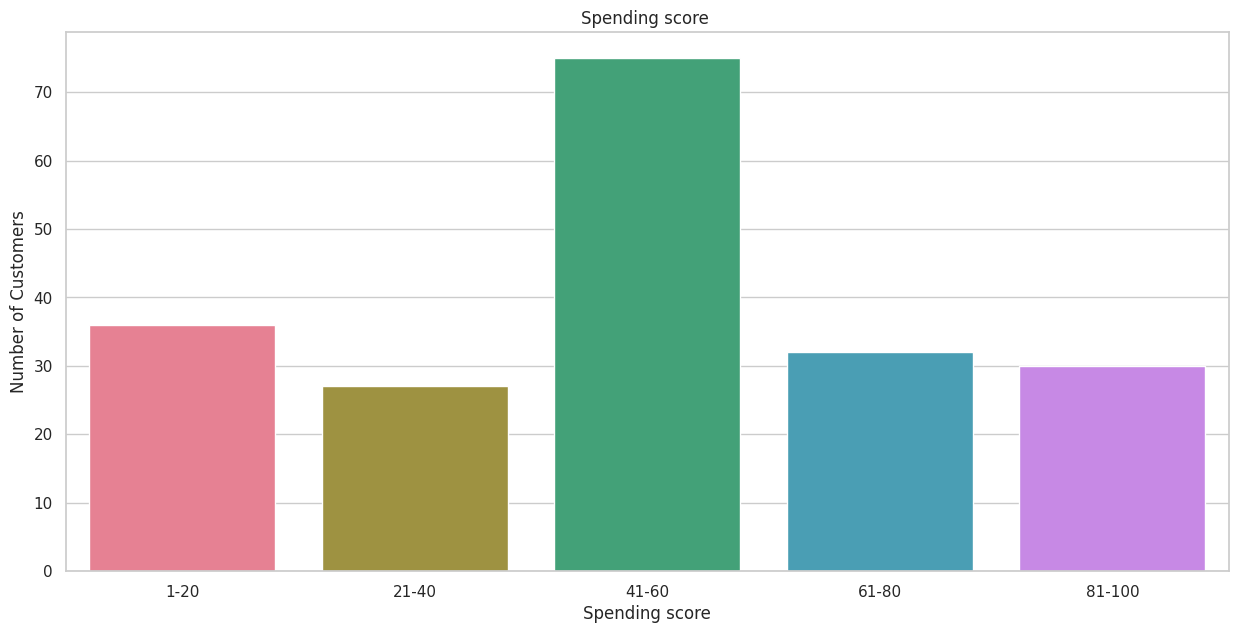

In [54]:
spendingGrp1= df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=1)&(df['Spending Score (1-100)']<=20)]
spendingGrp2= df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21)&(df['Spending Score (1-100)']<=40)]
spendingGrp3= df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41)&(df['Spending Score (1-100)']<=60)]
spendingGrp4= df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61)&(df['Spending Score (1-100)']<=80)]
spendingGrp5= df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81)&(df['Spending Score (1-100)']<=100)]

spendx=["1-20","21-40","41-60","61-80","81-100"]
spendy=[len(spendingGrp1),len(spendingGrp2),len(spendingGrp3),len(spendingGrp4),len(spendingGrp5)]

plt.figure(figsize=(15,7))
sns.barplot(x=spendx,y=spendy,palette='husl')
plt.title('Spending score ')
plt.xlabel('Spending score')
plt.ylabel('Number of Customers')
plt.show()

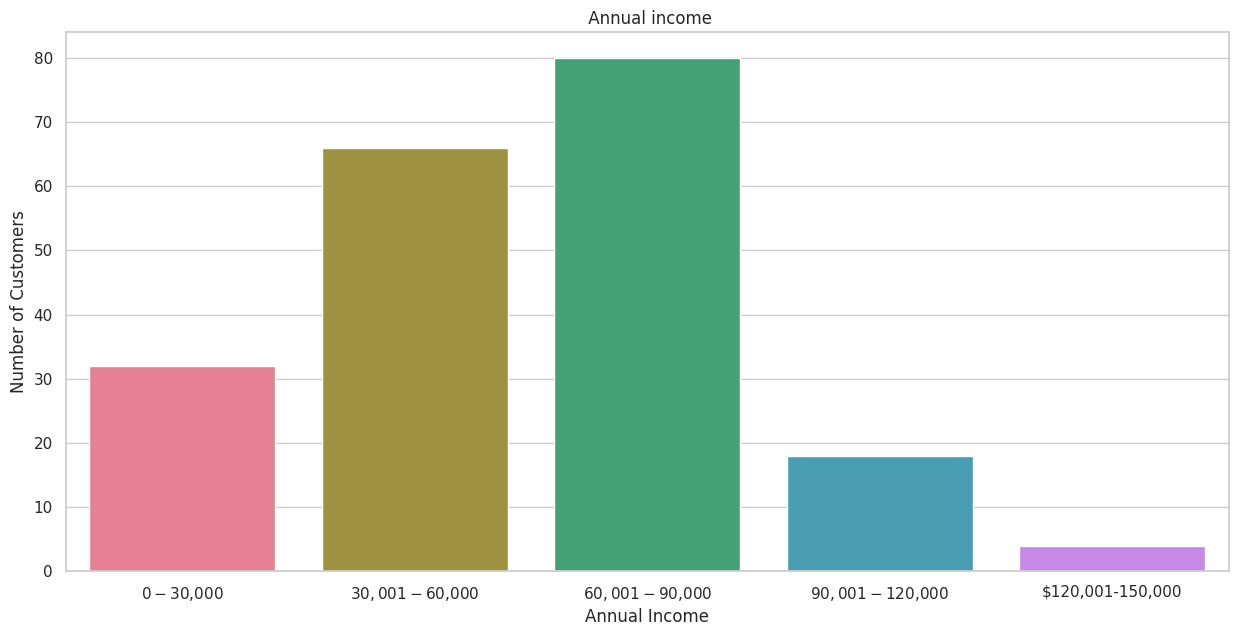

In [62]:
annInGrp1=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0)&(df["Annual Income (k$)"] <= 30)]
annInGrp2=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31)&(df["Annual Income (k$)"]<=60)]
annInGrp3=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61)&(df["Annual Income (k$)"]<=90)]
annInGrp4=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)&(df["Annual Income (k$)"]<=120)]
annInGrp5=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)&(df["Annual Income (k$)"]<=150)]

AIx=["$0 - $30,000","$30,001-$60,000","$60,001-$90,000","$90,001-$120,000","$120,001-150,000"]
AIy=[len(annInGrp1.values),len(annInGrp2.values),len(annInGrp3.values),len(annInGrp4.values),len(annInGrp5.values)]

plt.figure(figsize=(15,7))
sns.barplot(x=AIx,y=AIy,palette='husl')
plt.title(' Annual income')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.show()

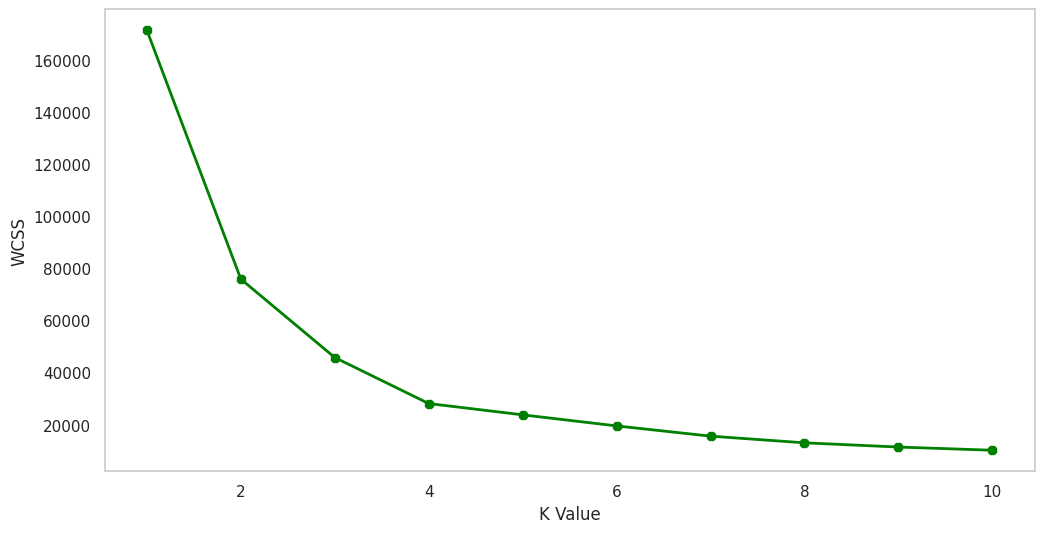

In [70]:
Km= df.loc[:,['Age','Spending Score (1-100)']].values

wcss=[]
for k in range(1,11):
  kmeans= KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(Km)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='green', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [78]:
kmeans = KMeans(n_clusters=4, init='k-means++')
y_kmeans = kmeans.fit_predict(Km)
print(y_kmeans)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [79]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


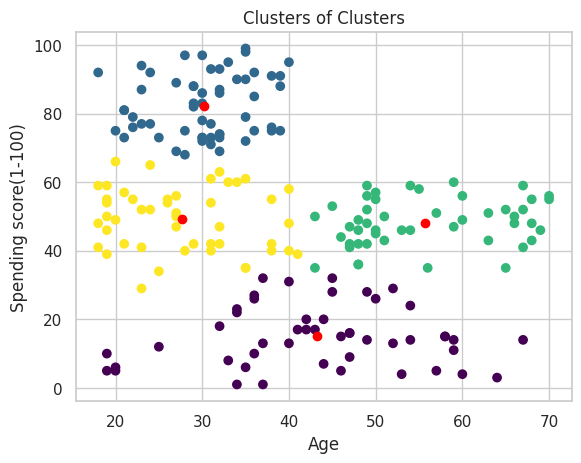

In [80]:
plt.scatter(Km[:,0],Km[:,1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')
plt.title('Clusters of Clusters')
plt.xlabel('Age')
plt.ylabel('Spending score(1-100)')
plt.show()

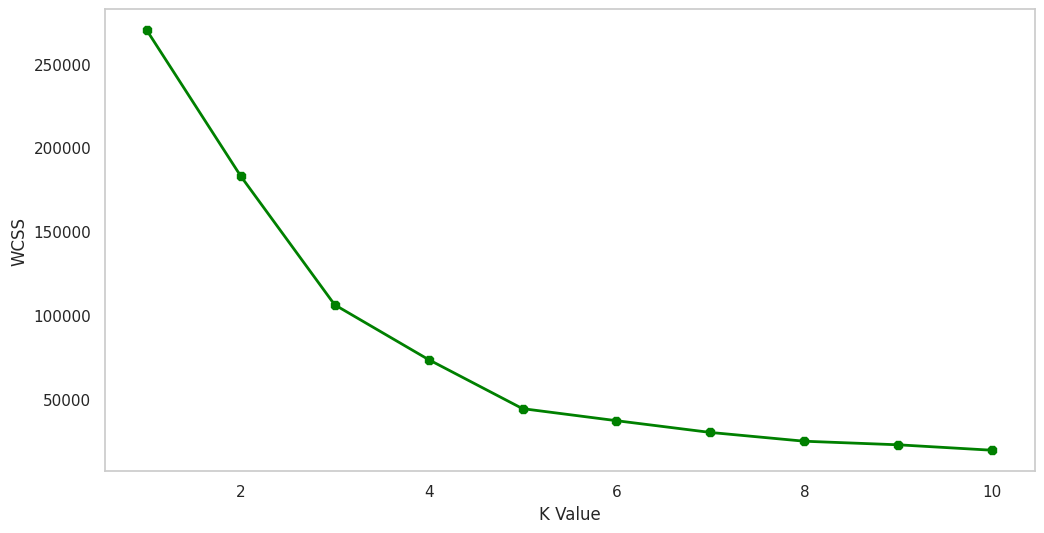

In [82]:
X2= df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

wcss=[]
for k in range(1,11):
  kmeans= KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='green', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [87]:
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X2)
print(y_kmeans)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 4 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 4 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 4 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [88]:
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]]


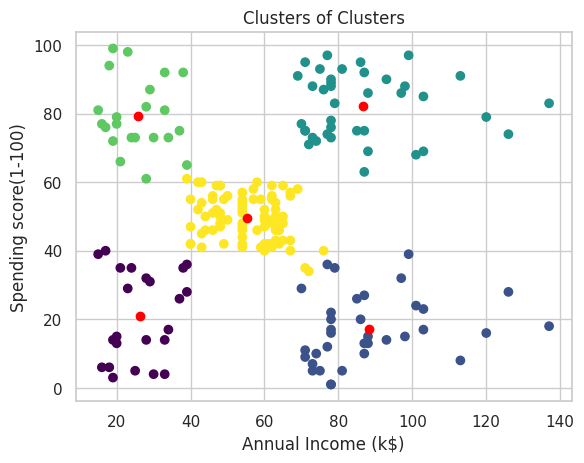

In [90]:
plt.scatter(X2[:,0],X2[:,1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')
plt.title('Clusters of Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score(1-100)')
plt.show()

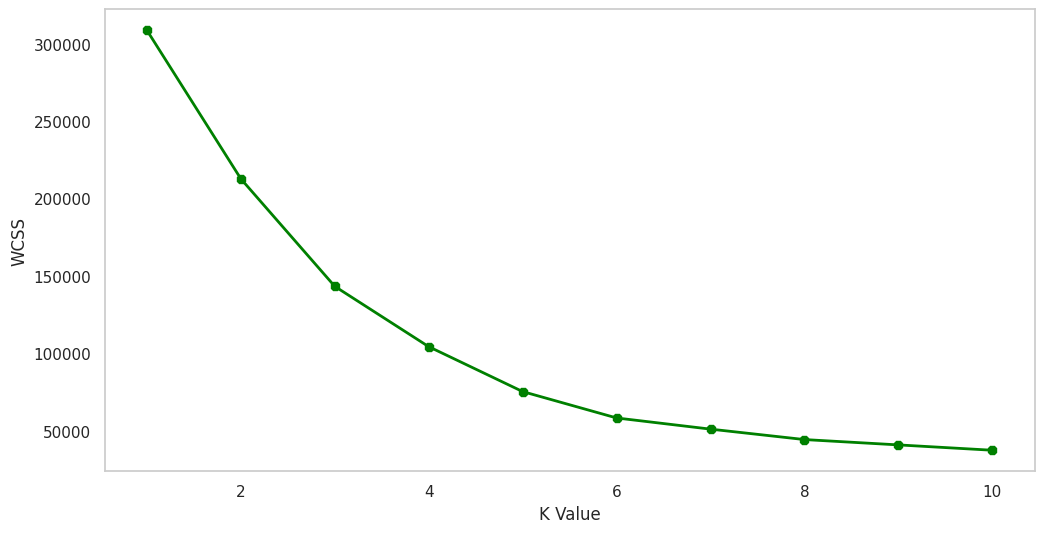

In [94]:
X3= df.iloc[:,1:]

wcss=[]
for k in range(1,11):
  kmeans= KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='green', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [96]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X3)
print(y_kmeans)

[0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [97]:
print(kmeans.cluster_centers_)

[[24.82142857 28.71428571 74.25      ]
 [44.875      48.9375     42.55208333]
 [32.69230769 86.53846154 82.12820513]
 [40.32432432 87.43243243 18.18918919]]


In [ ]:
clusters=kmeans.fit_predict(X3)
df['label']=clusters

fig = plt.figure(figsize=(20,10))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'], c=df['label'])
plt.scatter(X3[:,0],X3[:,1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')
plt.title('Clusters of Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score(1-100)')
plt.show()

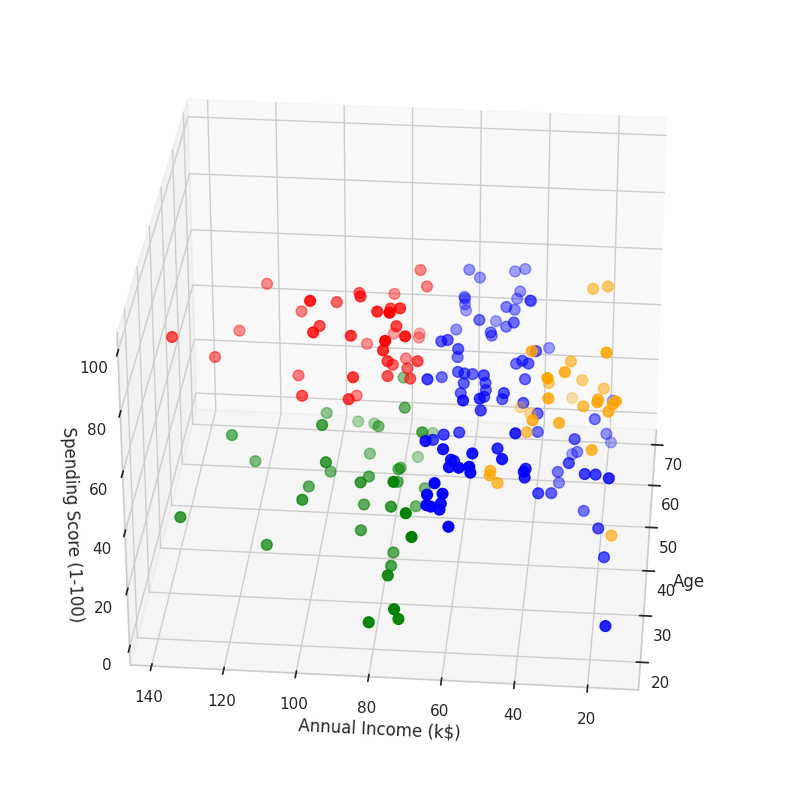

In [103]:
clusters = kmeans.fit_predict(X3)
df['label'] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()